In [1]:
spark

In [2]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
file_in = sc.textFile('data\\eula*txt')
file_in.count()

224

In [4]:
import re
from operator import add
chars = file_in.map(lambda s:len(s)).reduce(add)
chars

17362

In [6]:
words = file_in.flatMap(lambda line:re.split('\W+', line.lower().strip()))
words.take(50)

['',
 'you',
 'have',
 'received',
 'the',
 'software',
 'as',
 'part',
 'of',
 'the',
 'visual',
 'studio',
 '9',
 '0',
 'beta',
 'program',
 '',
 'the',
 'terms',
 'and',
 'conditions',
 'of',
 'the',
 'visual',
 'studio',
 '9',
 '0',
 'beta',
 '1',
 'license',
 'agreement',
 'applies',
 'to',
 'your',
 'use',
 'of',
 'the',
 'software',
 'microsoft',
 'pre',
 'release',
 'software',
 'license',
 'terms',
 'microsoft',
 'visual',
 'studio',
 '9',
 '0',
 'professional']

In [7]:
counts = file_in.flatMap(lambda line:line.split(" ")).map(lambda word:(word, 1)).reduceByKey(lambda a,b:a+b)
counts.take(20)

[('**You', 2),
 ('have', 10),
 ('as', 4),
 ('of', 50),
 ('Program.', 2),
 ('', 224),
 ('The', 20),
 ('conditions', 2),
 ('1', 4),
 ('agreement', 20),
 ('applies', 8),
 ('use', 18),
 ('software.**', 2),
 ('MICROSOFT', 10),
 ('LICENSE', 2),
 ('STUDIO', 2),
 ('PROFESSIONAL,', 2),
 ('These', 8),
 ('are', 6),
 ('an', 2)]

In [9]:
countsReverse = counts.map(lambda x:(x[1], x[0])).sortByKey(False)
countsReverse.take(20)

[(224, ''),
 (108, 'the'),
 (60, 'to'),
 (54, 'software'),
 (50, 'of'),
 (40, '�E'),
 (38, 'and'),
 (36, 'you'),
 (36, 'de'),
 (32, 'or'),
 (28, 'may'),
 (28, 'any'),
 (26, 'in'),
 (26, 'for'),
 (26, 'not'),
 (24, 'this'),
 (24, 'Microsoft'),
 (22, 'ou'),
 (22, 'your'),
 (22, 'with')]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

[224, 108, 60, 54, 50, 40, 38, 36, 36, 32, 28, 28, 26, 26, 26, 24, 24, 22, 22, 22, 20, 20, 20, 20, 18]


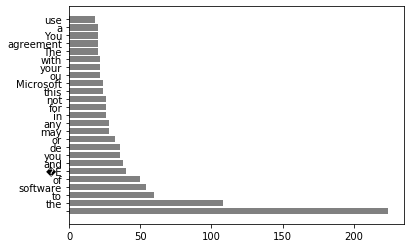

In [18]:
count = countsReverse.map(lambda x:x[0]).take(25)
word = countsReverse.map(lambda x:x[1]).take(25)
print(count)
plt.barh(range(len(count)),count, color='gray')
plt.yticks(range(len(count)),word)
plt.show()